# TD1 : Entrainement d'un moteur à courant continu

> Semestre P2020
    <p>CHOQUEUSE Vincent</p>

On se propose d’étudier le schéma synoptique de mise en œuvre d’un correcteur pour la régulation d’un processus analogique (un moteur à courant continu) caractérisé par sa fonction de transfert $F(p)$. Il s’agit de contrôler la vitesse de rotation du moteur.

In [15]:
import numpy as np
from scipy.signal import lti  
import matplotlib.pyplot as plt

## Description du système.

Le système est constitué par un moteur à courant continu, entraînant une charge. La grandeur d'entrée est la tension $U_m(t)$ aux bornes de l'induit. Le paramètre à commander est la vitesse de rotation de rotation $\Omega(t)$ (rad/s).


<figure>
    <img src="img/fig1.png" style="width: 600px">
    <figcaption style="text-align:center;font-style: italic;">Fig1. Description du système</figcaption>
</figure>


Pour faciliter la modélisation, on formule les hypothèses suivantes :
* On néglige les frottements $f$ du moteur. On considère uniquement son inertie.
* L'effet de réaction de l'induit est supposé nul, on considère seulement sa résistance $R$.

On rappelle ci-dessous les équations du moteur : 

\begin{align}
E(t) &= k.\Omega(t)\tag{fém}\\
U_m(t)&=E(t)+Ri(t)\tag{circuit électrique}\\
J\frac{d\Omega(t)}{dt}&=C_m(t)=ki(t)\tag{moment d'inertie}
\end{align}

## 1. Détermination de la fonction de transfert du moteur

**Question 1:** 

* Etablissez la fonction de transfert qui régit l'évolution de la vitesse $\Omega(t)$ en fonction de la tension d'entrée $u(t)$, c-a-d:

$$F(p)=\frac{\Omega(p)}{U_m(p)}$$

**Réponse:** 

#### Passage du domaine temporel au domaine de Laplace

* Linearité: Si $y(t)=\alpha_1 x_1(t)+\alpha_2 x_2(t)$ dans le domaine temporel, nous obtenons $Y(p)=\alpha_1 X_1(p)+\alpha_2 X_2(p)$ dans le domaine de Laplace.?
* Dérivation: Si $y(t)=\frac{d x(t)}{dt}$ dans le domaine temporel, nous obtenons $Y(p)=pX(p)$ dans le domaine de Laplace.


\begin{align}
E(p) &= k.\Omega(p)\tag{fém}\\
U_m(p)&=E(p)+RI(p)\tag{circuit électrique}\\
Jp \Omega(p)&=kI(p)\tag{moment d'inertie}
\end{align}


* Objectif intermédiaire: 

On utilise les deux premières équations

\begin{align}
U_m(p)&=k.\Omega(p)+RI(p)\tag{circuit électrique}\\
Jp \Omega(p)&=kI(p)\tag{moment d'inertie}
\end{align}

Ensuite, on multiplie la premiere equation par $k$ et on remplace le dernier terme:

\begin{align}
kU_m(p)&=k^2.\Omega(p)+RJp \Omega(p)
\end{align}

On factorise

\begin{align}
kU_m(p)&=\Omega(p)(k^2+RJp)
\end{align}




Fonction de transfert:

$$F(p)=\frac{\Omega(p)}{U_m(p)} = \frac{k}{k^2+RJp}=\frac{\frac{1}{k}}{1+\frac{RJ}{k^2}p}$$



**Question 2:** 

* Déterminez le gain statique, la constante de temps et le temps de réponse à 5% de la valeur finale. 
* Déterminer ensuite les valeurs numériques lorsque $R= 10 \Omega$, $k= 10 mNm/A$, $J =2.10^{-5}$ kg.m$^2$.


**Réponse:** 

En identifiant les paramètres de notre fonction de transfert, nous obtenons :

* Gain statique: $K=\frac{1}{k}$
* Constante de temps : $\tau=\frac{RJ}{k^2}$ (s)
* temps de réponse à $\pm 5\%$: $t_r=3\tau$ (s)

In [16]:
R = 10
k = 10*(10**-3)
J = 2*(10**-5)

K = 1/k
tau = R*J/(k**2)
tr = 3*tau

print("K={}".format(K))
print("tau={} s".format(tau))
print("tr={} s".format(tr))

K=100.0
tau=2.0 s
tr=6.0 s


Il peut être interessant de regarder la réponse indicielle du système (réponse à un échelon unitaire). Cette réponse se détermine facilement en Python.

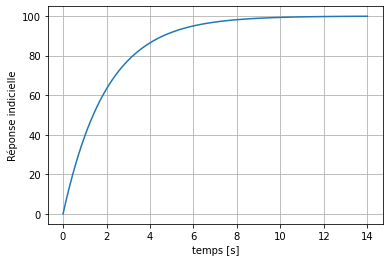

In [17]:
sys = lti([K],[tau,1]) # doc : https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lti.html
t,s = sys.step()

plt.plot(t,s)
plt.grid()
plt.xlabel("temps [s]")
plt.ylabel("Réponse indicielle");

## 2. Schéma fonctionnel de la régulation

Le "système" (moteur avec sa charge) est inséré dans une boucle d'asservissement qui comprend les éléments suivants :

* une dynamo tachymétrique intégrée au moteur qui mesure la vitesse de rotation. La dynamo délivre une tension continue proportionnelle à la vitesse de rotation du moteur. Le rapport de conversion est de 1V pour 1000 tr/mn.
* un amplificateur de puissance, pouvant débiter 1 A max, de gain en tension $A = 10$, attaque le circuit d'induit du moteur.
* un circuit de contrôle du moteur ou correcteur de fonction de transfert $C(p)$.

**Question 3:** 

* Tracez le schéma fonctionnel de l'ensemble qui fait apparaître :
    * la consigne (grandeur d'entrée);
    * les différents blocs (moteur, dynamo,...) tel qu'ils doivent être assemblés ;
    * la grandeur à contrôler (grandeur de sortie) ;
    * la contre-réaction (chaîne de retour)

* Déduisez en le schéma synoptique (blocs avec fonction de transfert) de la boucle de régulation **en faisant apparaître le retour unitaire**.

**Réponse:** 

<figure>
    <img src="img/fig1_cor.png" style="width: 600px">
    <figcaption style="text-align:center;font-style: italic;">Fig2. Schéma fonctionnel de la régulation </figcaption>
</figure>



In [18]:
A = 10
T = 1/(1000*2*np.pi/60) # Omega*T = V -> (1000*2*pi/60)*T=1 -> T = 1/((1000*2*pi/60))
print(T)

0.009549296585513721


**Question 4:** 

* Calculez numériquement la fonction de transfert de l'ensemble à asservir [moteur avec sa charge, dynamo et amplificateur] notée :

$$G(p) = \frac{S(p)}{U_c(p)}$$

* $S(p)$: sortie de la dynamo (en V)
* $U_c(p)$: entrée de l'ampli

### Mise en série de 3 systèmes.

* Premier système: $U_m(p)=A \times U_c(p)$
* Second système: $\Omega(p)=F(p)\times U_m(p)$
* Troisième système: $S(p)=T\times\Omega(p) $

Donc nous obtenons : $S(p)=T\times F(p)\times A \times U_c(p)$
La fonction de transfert est égale à 

$$G(p)=\frac{S(p)}{U_c(p)}=A T\times F(p)=\frac{ATK}{1+\tau p}$$


9.549296585513721


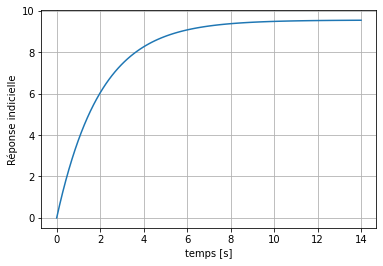

In [19]:
G = lti([A*T*K],[tau,1])
t,s = G.step()

plt.plot(t,s)
plt.grid()
plt.xlabel("temps [s]")
plt.ylabel("Réponse indicielle")
print(A*T*K)

## 3. Correction Proportionnelle

On souhaite asservir le système avec un correcteur proportionnel de fonction de transfert

$$C(p)=K_c$$

Notre objectif est ici de réduire le temps de réponse du système à la valeur $t_r=1$s.

**Question 5:** 

* Déterminer l'expression de la fonction de transfert en boucle fermée 

$$FTBF(p)=\frac{S(p)}{U(p)}$$

* $S(p)$: sortie de la dynamo (en V)
* $U(p)$ : tension de consigne.


$$FTBF(p)=\frac{C(p)G(p)}{1+C(p)G(p)}$$

$$FTBF(p)=\frac{K_c\frac{K_G}{1+\tau p}}{1+K_C\frac{K_G}{1+\tau p}}$$

$$FTBF(p)=\frac{K_cK_G}{(1+\tau p)\left(1+K_C\frac{K_G}{1+\tau p}\right)}$$

$$FTBF(p)=\frac{K_cK_G}{1+\tau p+K_C K_G}$$


$$FTBF(p)=\frac{\frac{K_cK_G}{1+K_C K_G}}{1+\frac{\tau}{1+K_cK_G} p}$$


**Question 6:** 

* Déterminer la valeur de $K_c$ permettant d'obtenir en boucle fermée un temps de réponse égal à $t_r=1$s.

Par identification :

* Gain statique: $K_{FTBF}=\frac{K_cK_G}{1+K_C K_G}$,
* Constante de temps : $\tau_{FTBF}=\frac{\tau}{1+K_cK_G}$.

Pour obtenir un temps de réponse de $t_r=1$s, nous devons avoir

$$t_r= 3\tau_{FTBF}=\frac{3\tau}{1+K_cK_G}=1$$

Avec $K_G=9.549$, $\tau=2$s, nous trouvons 
$$K_c=0.52$$

On considère en entrée du système un echelon d'amplitude $U_0$ c-a-d 

$$u(t)=\left\{\begin{array}{cc}
U_0&\text{si }t\ge 0\\
0 & \text{ailleurs}
\end{array}\right.$$

**Question 7:** 

* Pour la valeur de $K_c$ déterminée, calculer 
    * l'erreur statique $\epsilon(\infty)=u(\infty)-s(\infty)$ en régime permanent,
    * l'erreur statique relative (en pourcent) $\epsilon_r(\infty)=\frac{\epsilon(\infty)}{u(\infty)}\times 100$

**Réponse**

* Valeur Finale : $s(\infty)= K_{FTBF}\times U_0=0.8323$
* Erreur statique : $\epsilon(\infty)=U_0-K_{FTBF}\times U_0=(1-K_{FTBF})U_0$.
* Erreur statique relative: $\epsilon_r(\infty)=\frac{\epsilon(\infty)}{u(\infty)}\times 100=100\time (1-K_{FTBF})$.

In [20]:
K_c = 0.52
K_G = 9.549
K_FTBF = K_c*K_G/(1+K_c*K_G)
erreur_statique_relative = (1-K_FTBF)*100
print("erreur statique relative: {} (100\%)".format(erreur_statique_relative))

erreur statique relative: 16.763110428666263 (100\%)
